- 시계열 분석
    - 시계열 자료 : 시간의 흐름에 따라 관찰된 값들
    - 약점 : 분석 시점에 따라 결과가 다름 (분석 시점 직전의 경향에 따라서 달라짐)
        - 따라서 장기적인 분석에 대해서는 정확성이 떨어지게 됨
        - 경향, 주기, 계절성을 파악해서 활용이 필요함
    - 비정상성 / 정상성 시계열 자료 : 비정상성은 복잡하여 다루기 어려운 자료, 해당 자료를 단순화시켜 이해하거나 다루기 쉬운 데이터로 바꾼 데이터가 정상성 자료
        - 정상성 : 데이터의 평균과 분산이 일정하며 공분산도 시차에만 의존하며 특정 시점에는 의존하지 않는 상태
            - 평균 : 시간에 따라 평균이 일정하지 않음. '차분'을 통하여 정상화
            - 분산 : 분산의 경우 '변환'을 통하여 정상화

- ADF 테스트 : 시계열 데이터의 정상성 여부를 판단하는 검정
    - 귀무가설 : 비정상성이다
    - 대립가설 : 정상성이다
    - 정상성의 과정은 ADF 테스트가 대립가설을 채택할때 까지 차분과 변환을 반복 수행

- 일반차분 : 바로 전 시점의 자료를 빼기
- 계절차분 : 여러 시점 전의 자료를 빼기

- 추세 : 시간이 지남에 따라 평균이 변하는 추세
- 추세가 눈에 보이더라도 편차는 시간에 따라 변할 수 있음 (진폭)
    - 이를 일정하게 보정하기 위해서 로그 변환 등을 수행할 수 있음

- 시계열 분석 방법
    - 평균이동법 : 기간별 이동 평균을 계산하여 추세를 파악
    - 지수평활법 : 모든 시계열 자료로 평균을 구하고 시간의 흐름에 따라 가중치를 부여 (최근 기준에 더 많은 가중치)
    - 분해시계열 : 시계열에 영향을 주는 일반적인 요인을 분리하여 분석
    - 만들어진 통계적 모형 사용 : 자기회귀모형(AR), 이동평균모형(MA), 자기회귀누적이동평균모형(ARIMA) 등

- 분해시계열
    - 추세요인 : 자료의 형태를 파악
    - 계절요인 : 주기에 따라 자료의 변화 파악
    - 불규칙요인 : 회귀분석의 잔차에 해당하는 요인

- 통계적 모형 : 자기회귀누적이동평균모형(ARIMA)를 주로 사용함
    - 비정상시계열 모형이며 세가지 지표를 사용함
        - AR 모형과 관련있는 p 차수
        - MA 모형과 관련있는 q 차수
            - ARIMA에서 ARMA로 정상화할 때 차분하는 횟수를 의미
    - 분석을 간편하게 해주는 auto ARIMA 모델이 있음

- 페이스북에서 발표한 prophet 머신러닝 라이브러리가 성능이 강력함
    - ARIMA : 장기 예측에 강함 (월, 년 단위)
    - prophet : 단기 예측에 강함 (시간, 일, 주 단위)

In [1]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')

work_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(work_path)

from hossam.util import *
from hossam.plot import *
from hossam.timeserise import *
from yjk_module.preprocessing import *
from yjk_module.ml_module import *

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
origin = pd.read_excel("./data/air_passengers.xlsx")

In [3]:
df1 = origin.copy()
df1.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [5]:
df1.set_index("Month", inplace = True)

In [6]:
df1.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


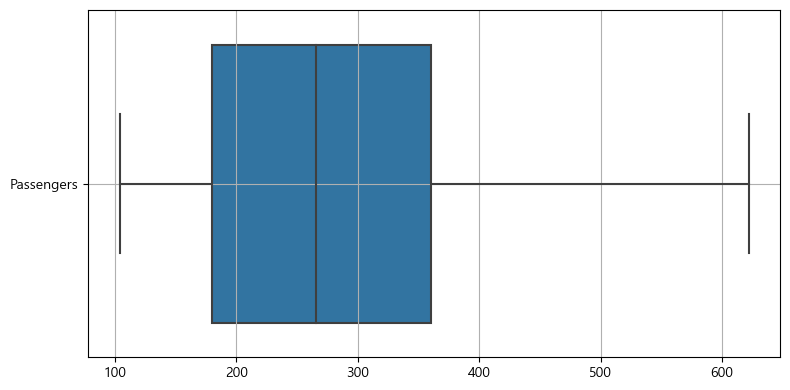

In [7]:
my_boxplot(df1, orient = 'h', figsize = (8, 4))

- 시계열 데이터를 다루기 전에 결측치와 이상치가 없는 것을 확인해야 함

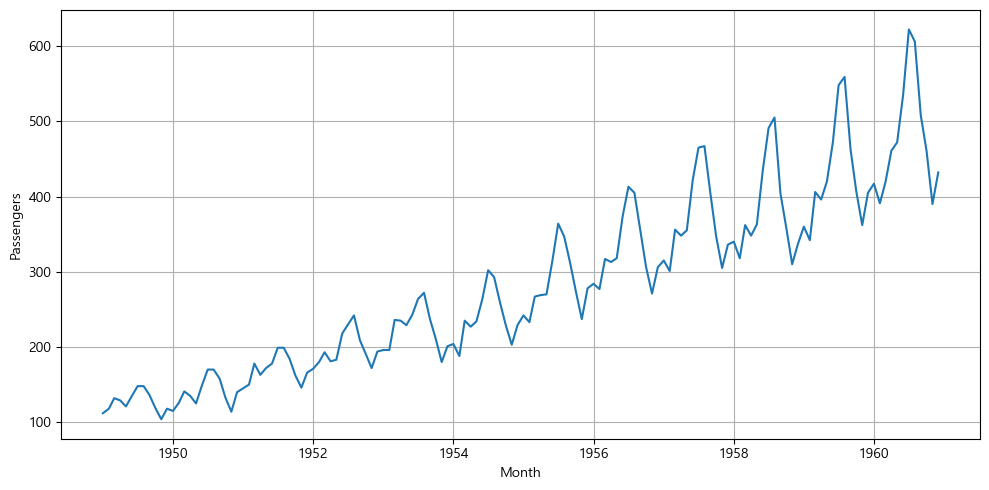

In [8]:
my_lineplot(df1, xname = df1.index, yname = 'Passengers')

In [9]:
ar = adfuller(df1['Passengers'])

print('검정통계량(ADF Statistic): %f' % ar[0])
print('유의수준(p-value): %f' % ar[1])
print('최적차수(num of lags): %f' % ar[2])
print('관측치 개수(num of observations): %f' % ar[3])
print('기각값(Critical Values):')
for key, value in ar[4].items():
    print('\t%s: %.3f' % (key, value))

print('데이터 정상성 여부: ', '정상' if ar[1] <= 0.05 else '비정상')

검정통계량(ADF Statistic): 0.815369
유의수준(p-value): 0.991880
최적차수(num of lags): 13.000000
관측치 개수(num of observations): 130.000000
기각값(Critical Values):
	1%: -3.482
	5%: -2.884
	10%: -2.579
데이터 정상성 여부:  비정상


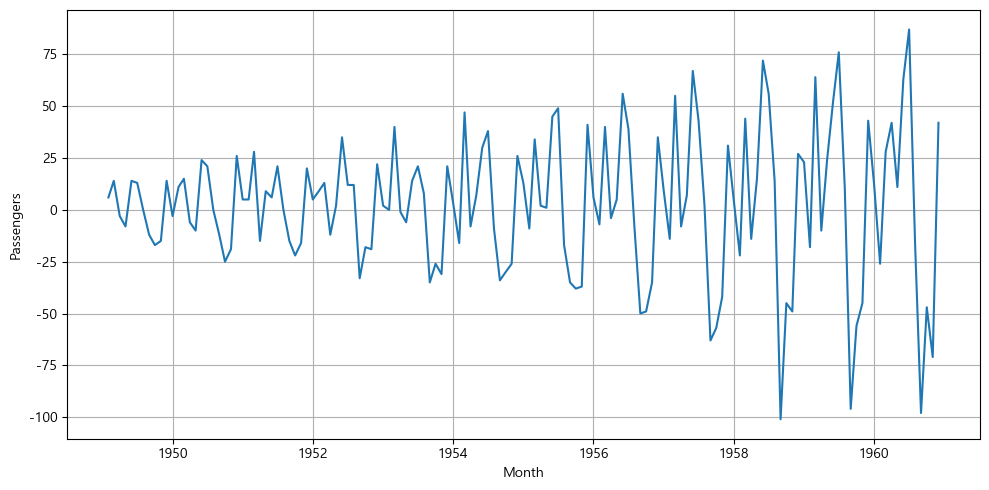

검정통계량(ADF Statistic): -2.829267
유의수준(p-value): 0.054213
최적차수(num of lags): 12.000000
관측치 개수(num of observations): 130.000000
기각값(Critical Values):
	1%: -3.482
	5%: -2.884
	10%: -2.579
데이터 정상성 여부:  비정상


In [10]:
df1_2 = df1.diff().dropna()
my_lineplot(df=df1_2, xname=df1_2.index, yname='Passengers')

ar = adfuller(df1_2['Passengers'])

print('검정통계량(ADF Statistic): %f' % ar[0])
print('유의수준(p-value): %f' % ar[1])
print('최적차수(num of lags): %f' % ar[2])
print('관측치 개수(num of observations): %f' % ar[3])
print('기각값(Critical Values):')
for key, value in ar[4].items():
    print('\t%s: %.3f' % (key, value))

print('데이터 정상성 여부: ', '정상' if ar[1] < 0.05 else '비정상')

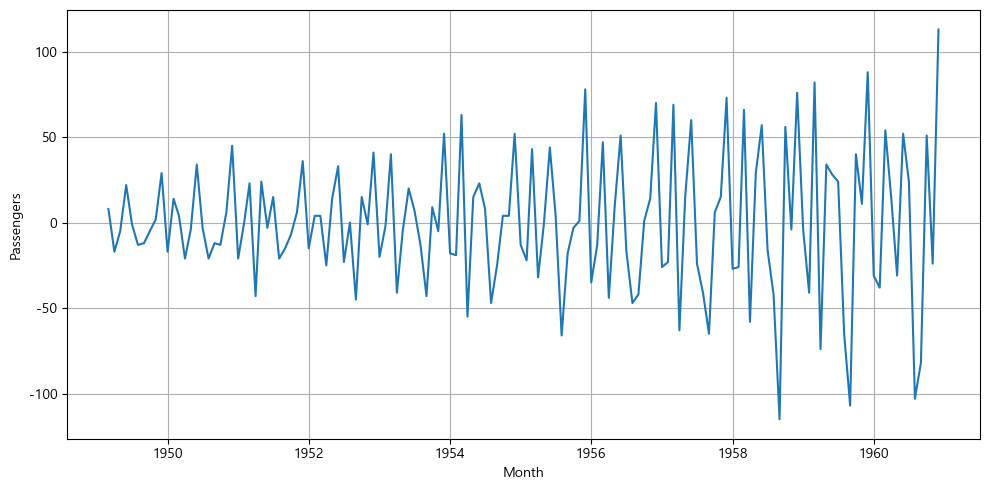

검정통계량(ADF Statistic): -16.384232
유의수준(p-value): 0.000000
최적차수(num of lags): 11.000000
관측치 개수(num of observations): 130.000000
기각값(Critical Values):
	1%: -3.482
	5%: -2.884
	10%: -2.579
데이터 정상성 여부:  정상


In [11]:
df1_3 = df1_2.diff().dropna()
my_lineplot(df=df1_3, xname=df1_3.index, yname='Passengers')

ar = adfuller(df1_3['Passengers'])

print('검정통계량(ADF Statistic): %f' % ar[0])
print('유의수준(p-value): %f' % ar[1])
print('최적차수(num of lags): %f' % ar[2])
print('관측치 개수(num of observations): %f' % ar[3])
print('기각값(Critical Values):')
for key, value in ar[4].items():
    print('\t%s: %.3f' % (key, value))

print('데이터 정상성 여부: ', '정상' if ar[1] < 0.05 else '비정상')

- 평균이동법, 지수평활법은 별도의 패키지가 필요하지 않음
    - 평균이동법 : 구간의 평균을 이어서 표시하는 것
        - 2~3개 단위로 묶어 평균을 구해 그 추이를 시각화하여 판별 (주관적 방법)
        - 데이터의 증감 추이를 확인하기 위해 차분하지 않은 원본 데이터로 수행하기도 함

In [12]:
df2 = origin.copy()
df2.set_index('Month', inplace = True)

In [13]:
df2['month3'] = df2['Passengers'].rolling(3).mean()
df2['month6'] = df2['Passengers'].rolling(6).mean()
df2['month9'] = df2['Passengers'].rolling(9).mean()
df2.head(10)

,Passengers,month3,month6,month9
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN
1949-03-01,132,120.666667,NaN,NaN
1949-04-01,129,126.333333,NaN,NaN
1949-05-01,121,127.333333,NaN,NaN
1949-06-01,135,128.333333,124.500000,NaN
1949-07-01,148,134.666667,130.500000,NaN
1949-08-01,148,143.666667,135.500000,NaN
1949-09-01,136,144.000000,136.166667,131.000000


In [14]:
df1_3['month3'] = df1_3['Passengers'].rolling(3).mean()
df1_3['month6'] = df1_3['Passengers'].rolling(6).mean()
df1_3['month9'] = df1_3['Passengers'].rolling(9).mean()
df1_3.head(10)

,Passengers,month3,month6,month9
Month,,,,
1949-03-01,8.0,NaN,NaN,NaN
1949-04-01,-17.0,NaN,NaN,NaN
1949-05-01,-5.0,-4.666667,NaN,NaN
1949-06-01,22.0,0.000000,NaN,NaN
1949-07-01,-1.0,5.333333,NaN,NaN
1949-08-01,-13.0,2.666667,-1.000000,NaN
1949-09-01,-12.0,-8.666667,-4.333333,NaN
1949-10-01,-5.0,-10.000000,-2.333333,NaN
1949-11-01,2.0,-5.000000,-1.166667,-2.333333


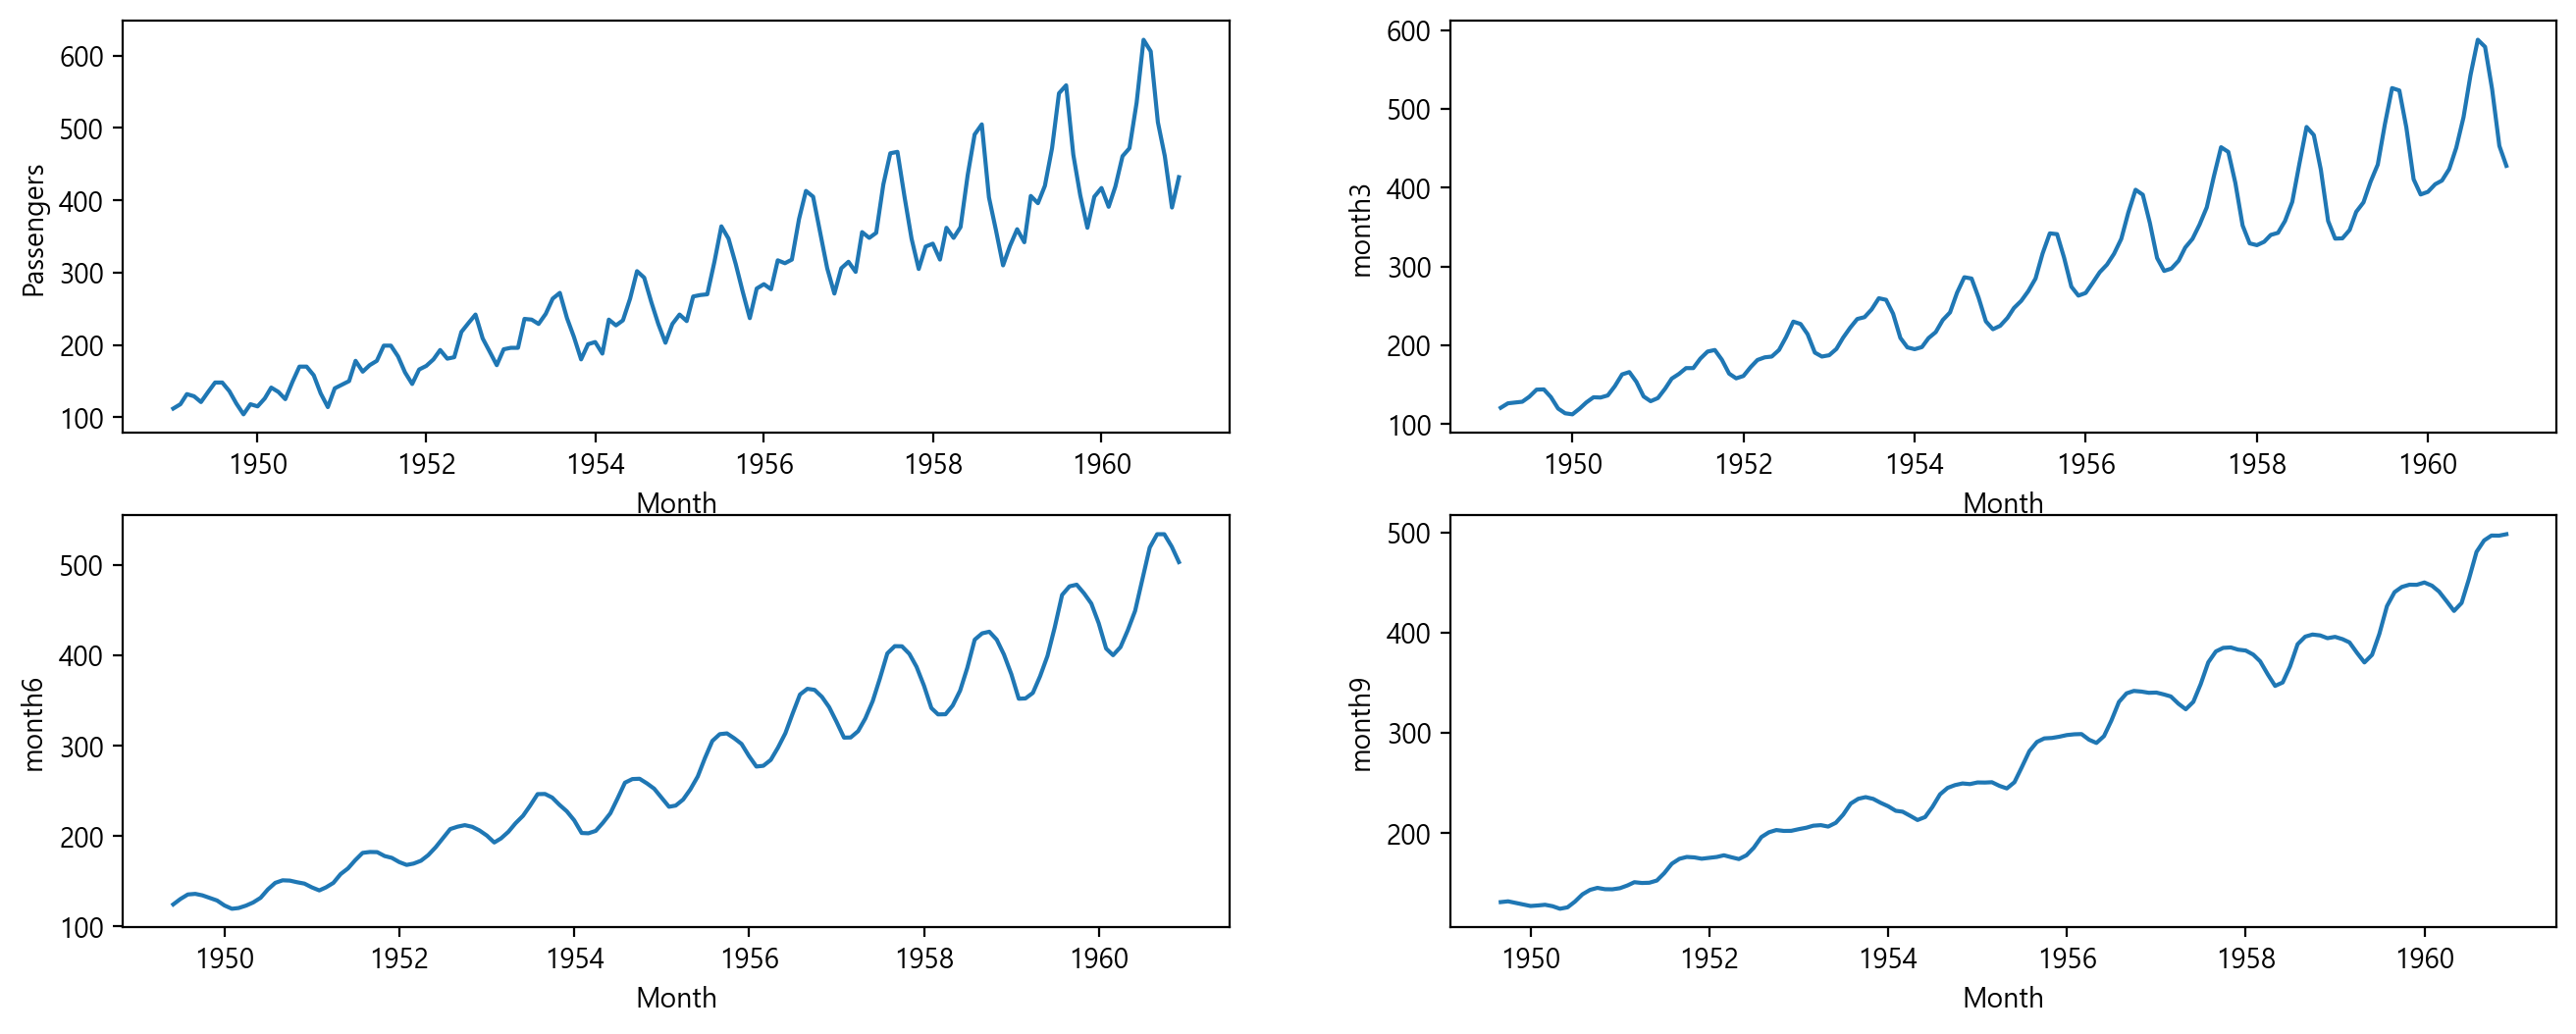

In [15]:
fig, ax = plt.subplots(2, 2, figsize = (16, 6))
ax = ax.flatten()

for i, v in enumerate(df2.columns):
    sb.lineplot(data = df2, x = df2.index, y = v, ax = ax[i])

plt.show()

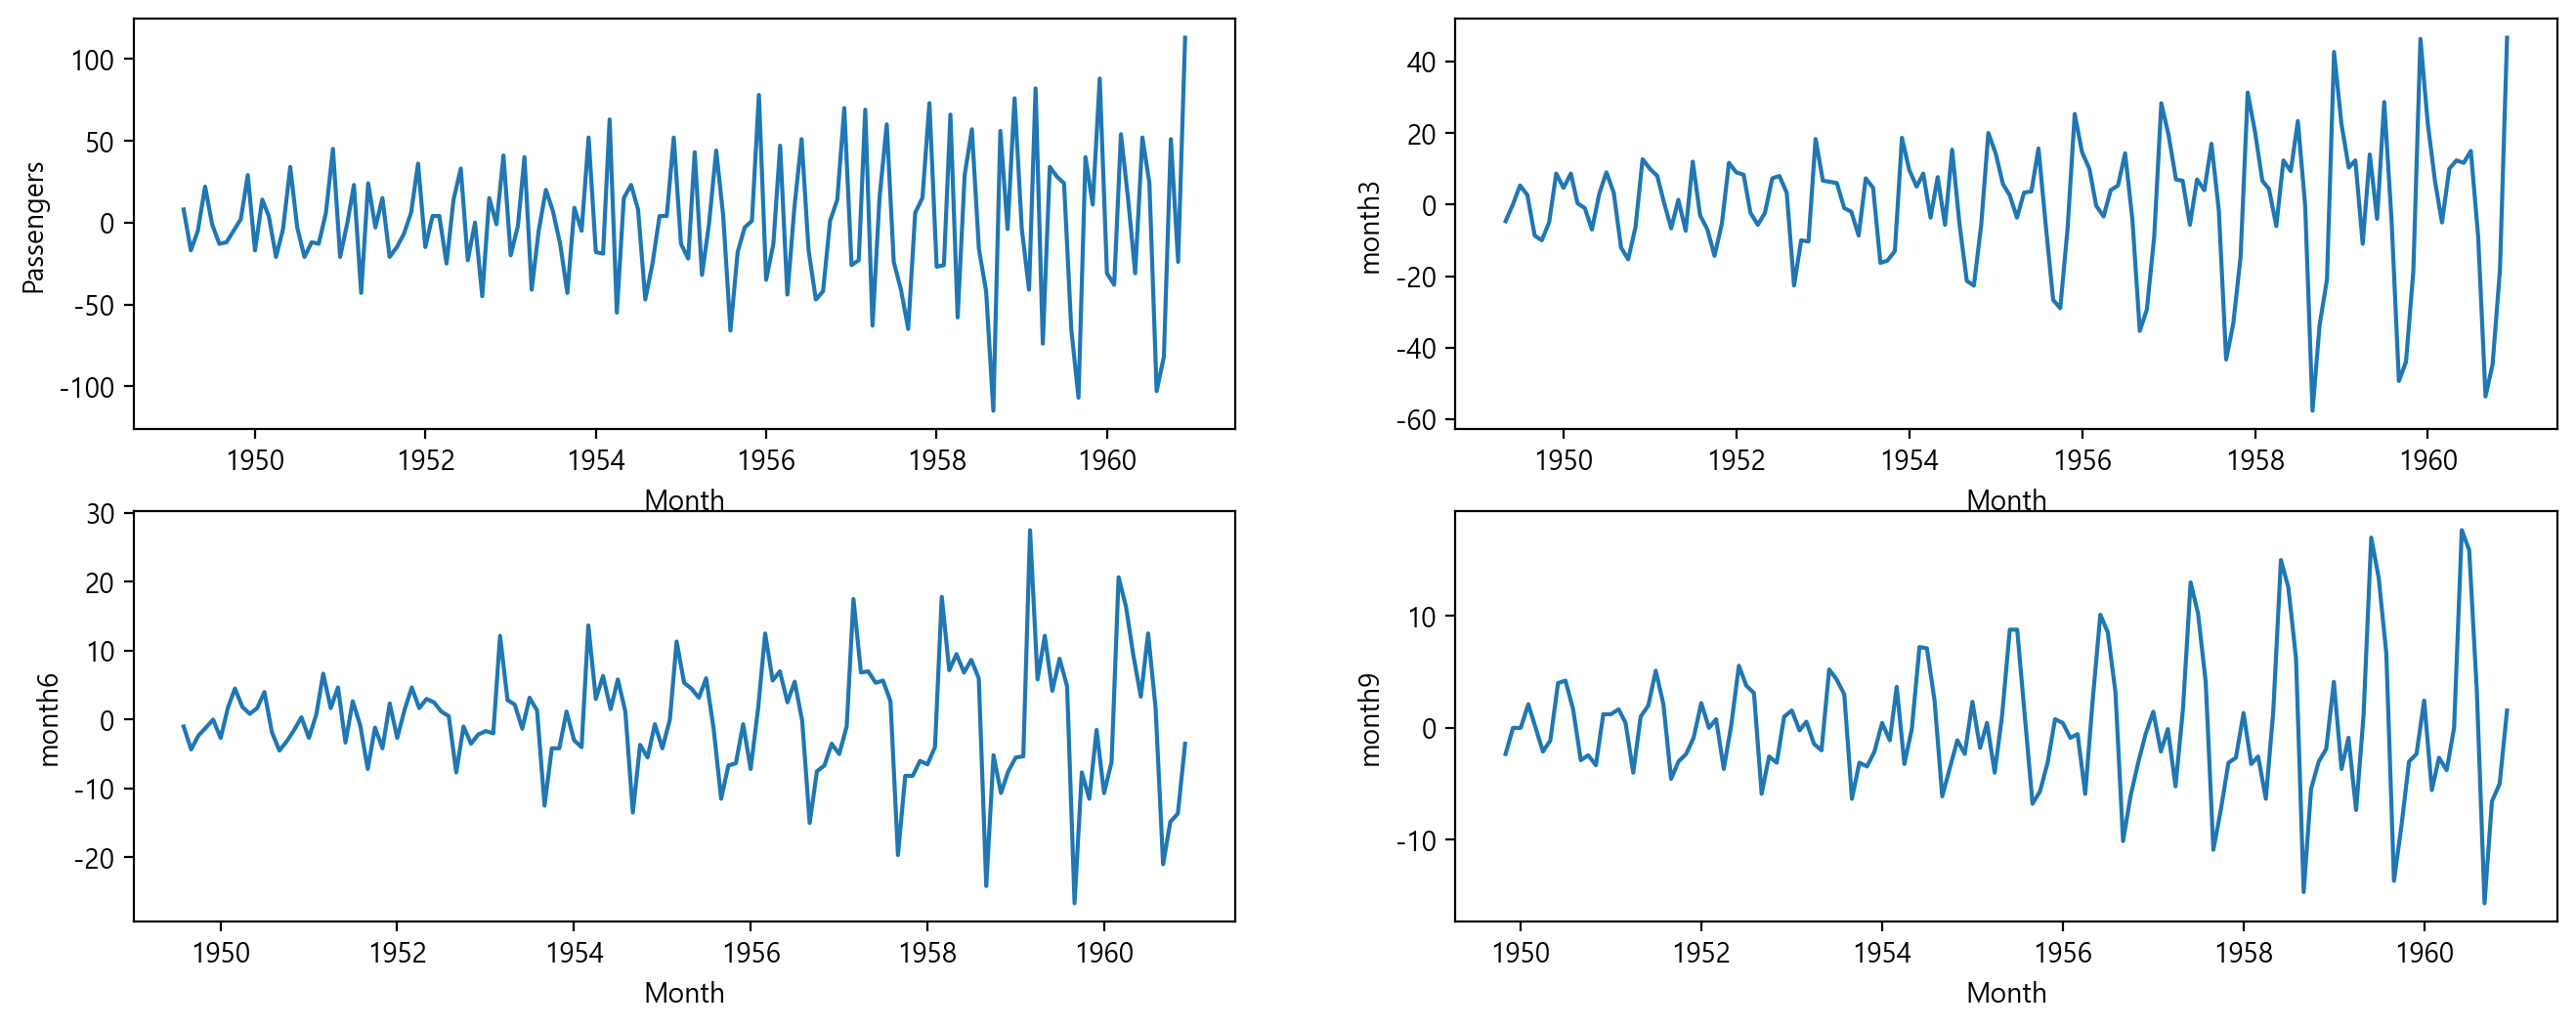

In [16]:
fig, ax = plt.subplots(2, 2, figsize = (16, 6))
ax = ax.flatten()

for i, v in enumerate(df1_3.columns):
    sb.lineplot(data = df1_3, x = df1_3.index, y = v, ax = ax[i])

plt.show()

- 평균이동을 할 수록 그래프가 단순해지기 때문에 6개월 주기로 증감을 반복하는 트렌드가 있음을 확인할 수 있음

- 지수평활법 (지수평균이동) : 최근의 값에 가중치를 두며 이동평균을 계산

In [17]:
df2['ewm3'] = df2['Passengers'].ewm(3).mean()
df2['ewm6'] = df2['Passengers'].ewm(6).mean()
df2['ewm9'] = df2['Passengers'].ewm(9).mean()
df2.head(10)

,Passengers,month3,month6,month9,ewm3,ewm6,ewm9
Month,,,,,,,
1949-01-01,112,NaN,NaN,NaN,112.000000,112.000000,112.000000
1949-02-01,118,NaN,NaN,NaN,115.428571,115.230769,115.157895
1949-03-01,132,120.666667,NaN,NaN,122.594595,121.700787,121.372694
1949-04-01,129,126.333333,NaN,NaN,124.937143,123.966516,123.590579
1949-05-01,121,127.333333,NaN,NaN,123.646607,123.177832,122.957974
1949-06-01,135,128.333333,124.500000,NaN,127.099495,125.976631,125.527987
1949-07-01,148,134.666667,130.500000,NaN,133.129534,130.742993,129.835420
1949-08-01,148,143.666667,135.500000,NaN,137.260738,134.221877,133.024803
1949-09-01,136,144.000000,136.166667,131.000000,136.919967,134.560448,133.510486


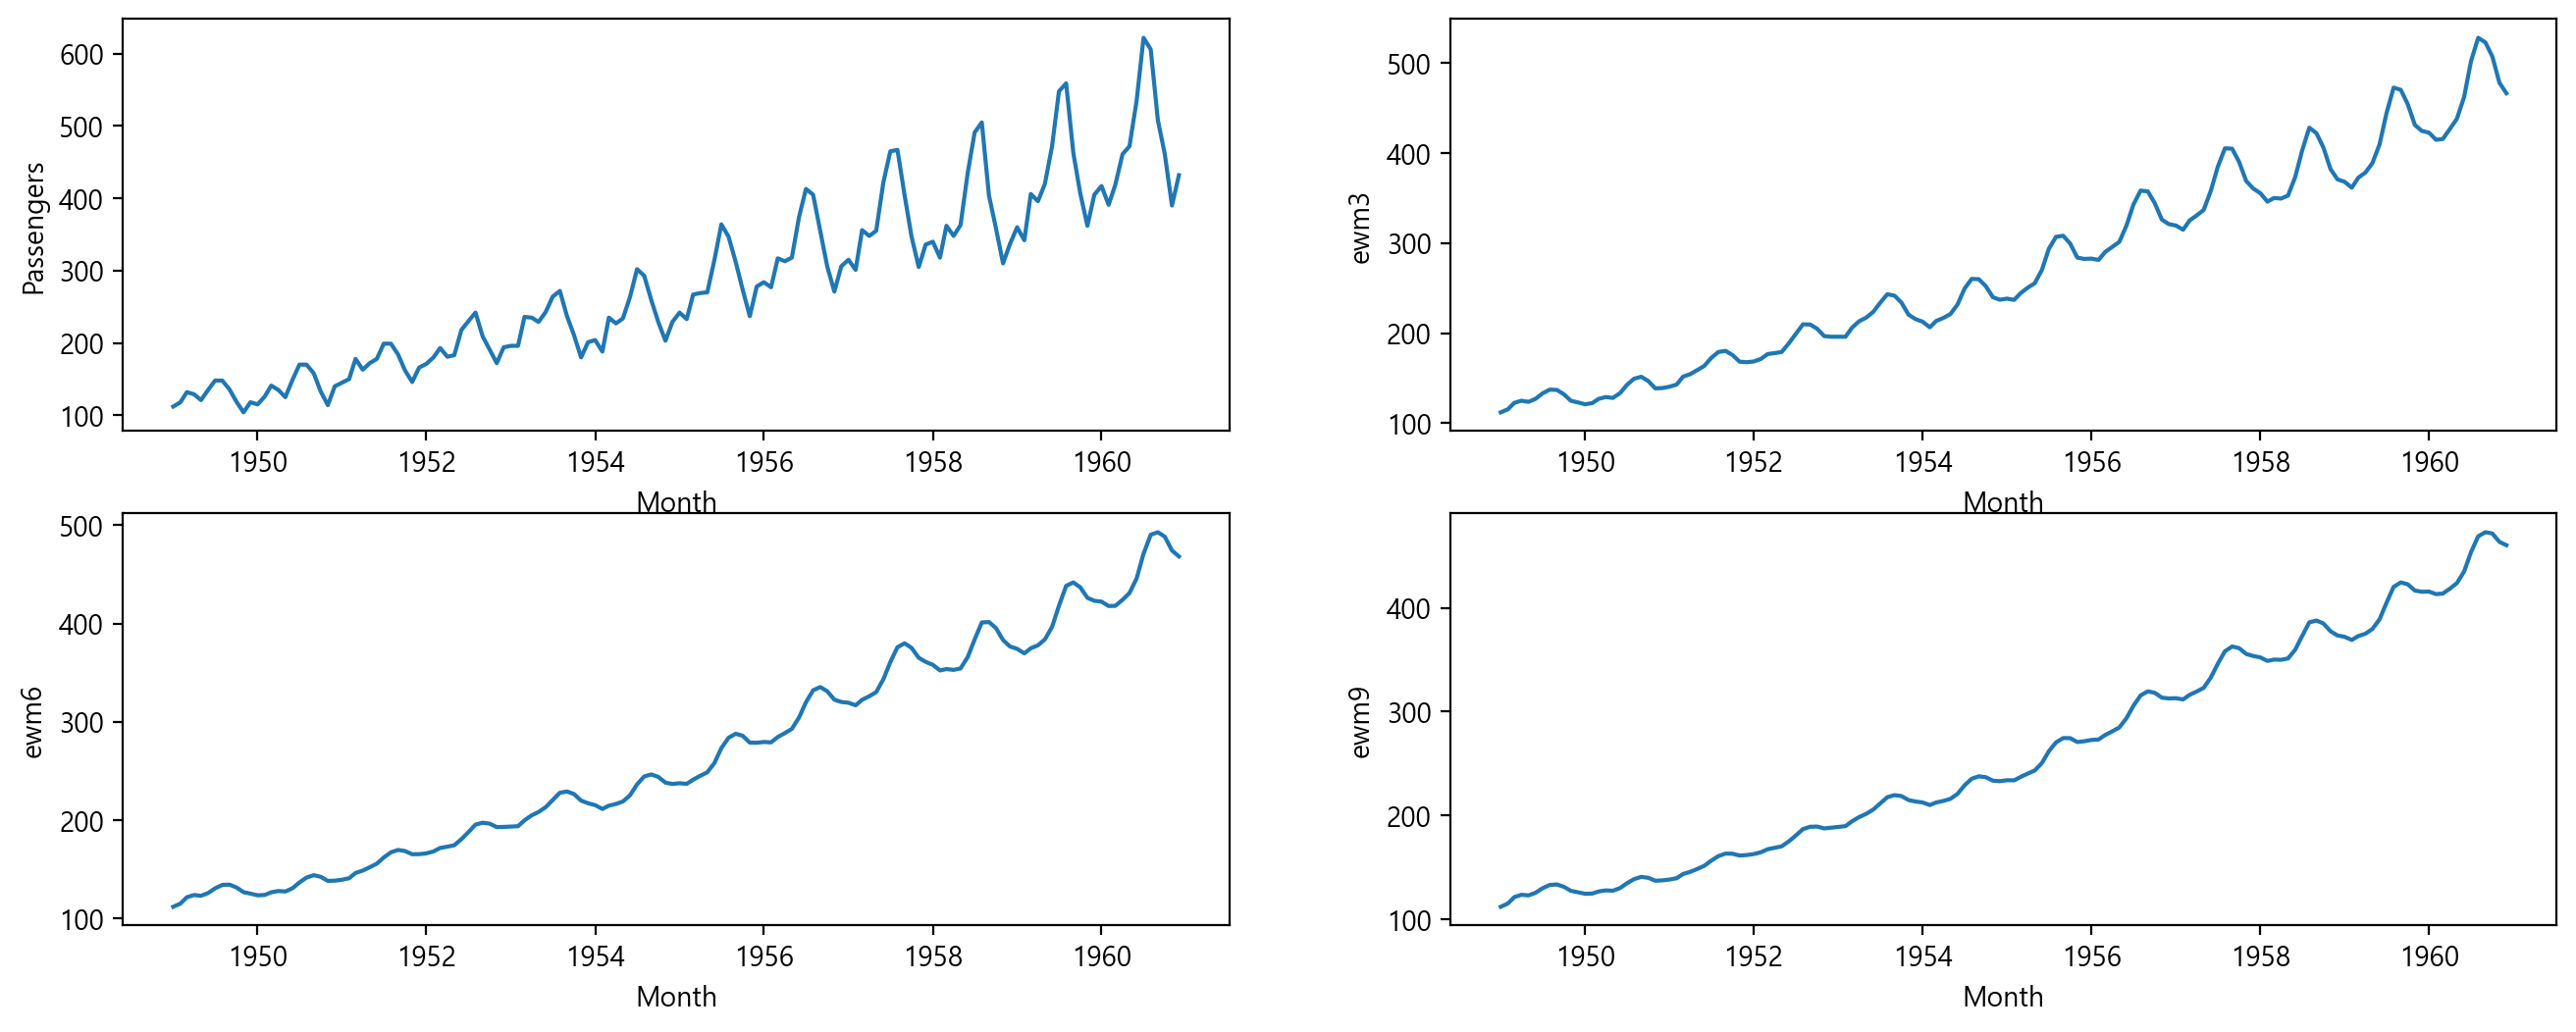

In [18]:
fig, ax = plt.subplots(2, 2, figsize = (16, 6))
ax = ax.flatten()
tmp = df2[['Passengers', 'ewm3', 'ewm6', 'ewm9']]

for i, v in enumerate(tmp.columns):
    sb.lineplot(data = tmp, x = tmp.index, y = v, ax = ax[i])

plt.show()

In [19]:
df1_3['ewm3'] = df1_3['Passengers'].ewm(3).mean()
df1_3['ewm6'] = df1_3['Passengers'].ewm(6).mean()
df1_3['ewm9'] = df1_3['Passengers'].ewm(9).mean()
df1_3.head(10)

,Passengers,month3,month6,month9,ewm3,ewm6,ewm9
Month,,,,,,,
1949-03-01,8.0,NaN,NaN,NaN,8.000000,8.000000,8.000000
1949-04-01,-17.0,NaN,NaN,NaN,-6.285714,-5.461538,-5.157895
1949-05-01,-5.0,-4.666667,NaN,NaN,-5.729730,-5.283465,-5.099631
1949-06-01,22.0,0.000000,NaN,NaN,4.411429,3.185520,2.780459
1949-07-01,-1.0,5.333333,NaN,NaN,2.637644,2.072749,1.857293
1949-08-01,-13.0,2.666667,-1.000000,NaN,-2.118206,-1.495598,-1.313555
1949-09-01,-12.0,-8.666667,-4.333333,NaN,-4.969219,-3.768991,-3.361932
1949-10-01,-5.0,-10.000000,-2.333333,NaN,-4.977770,-4.017153,-3.649548
1949-11-01,2.0,-5.000000,-1.166667,-2.333333,-3.091714,-2.871434,-2.727292


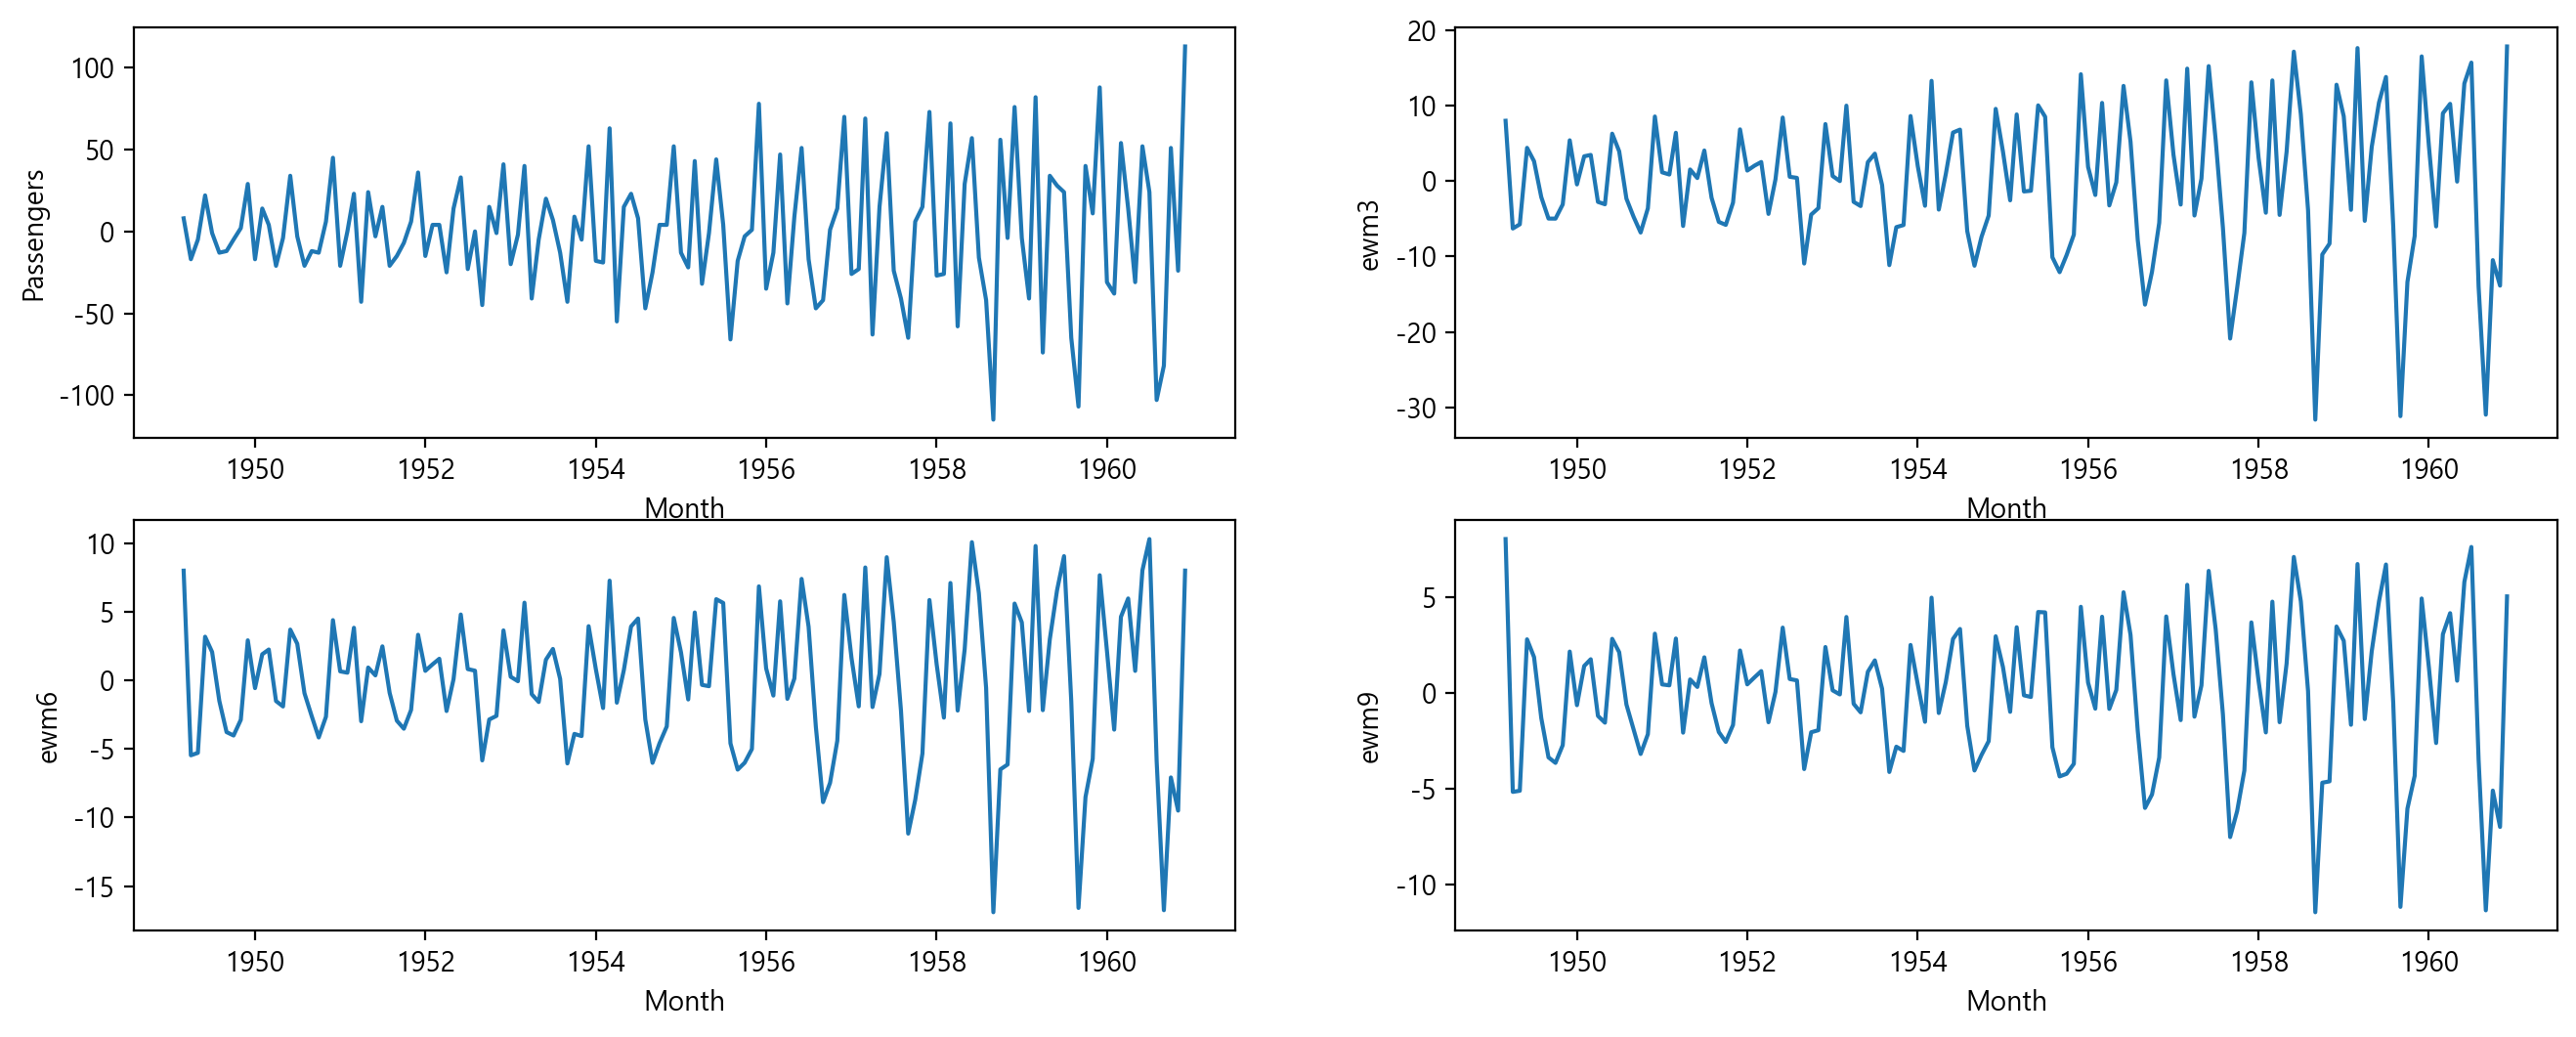

In [20]:
fig, ax = plt.subplots(2, 2, figsize = (16, 6))
ax = ax.flatten()
tmp = df1_3[['Passengers', 'ewm3', 'ewm6', 'ewm9']]

for i, v in enumerate(tmp.columns):
    sb.lineplot(data = tmp, x = tmp.index, y = v, ax = ax[i])

plt.show()

- 평균이동법과 지수평활법은 시각적인 결과물을 분석가의 주관적인 판단으로 해석
    - 추론통계보다는 탐색적 데이터 분석에 가까움

- 분해시계열
    - 시계열에 영향을 주는 요인을 시계열에서 분리하여 분석
        - 데이터를 추세, 계절성, 잔차로 분해
    - 하나의 인풋에 여러개의 아웃풋이 발생
    - 가법모델과 승법모델이 존재
        - 가법모델 : 데이터를 구성하는 성분이 덧셈으로 연결되었다고 가정
        - 승법모델 : 데이터를 구성하는 성분이 곱셈으로 연결되었다고 가정, 로그변환으로 가법모델로 변환할 수 있음

<img src = "./res/model.png">

In [21]:
# model_name = 'additive' # 가법
model_name = 'multiplicative' # 승법

sd = seasonal_decompose(df1['Passengers'], model = model_name)
sd

- 트렌드

In [22]:
sd.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

- 계절성

In [23]:
sd.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

- 잔차

In [24]:
sd.resid

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

In [25]:
sd_df = pd.concat([sd.observed, sd.trend, sd.seasonal, sd.resid], axis = 1)
sd_df.head()

,Passengers,trend,seasonal,resid
Month,,,,
1949-01-01,112.0,NaN,0.910230,NaN
1949-02-01,118.0,NaN,0.883625,NaN
1949-03-01,132.0,NaN,1.007366,NaN
1949-04-01,129.0,NaN,0.975906,NaN
1949-05-01,121.0,NaN,0.981378,NaN


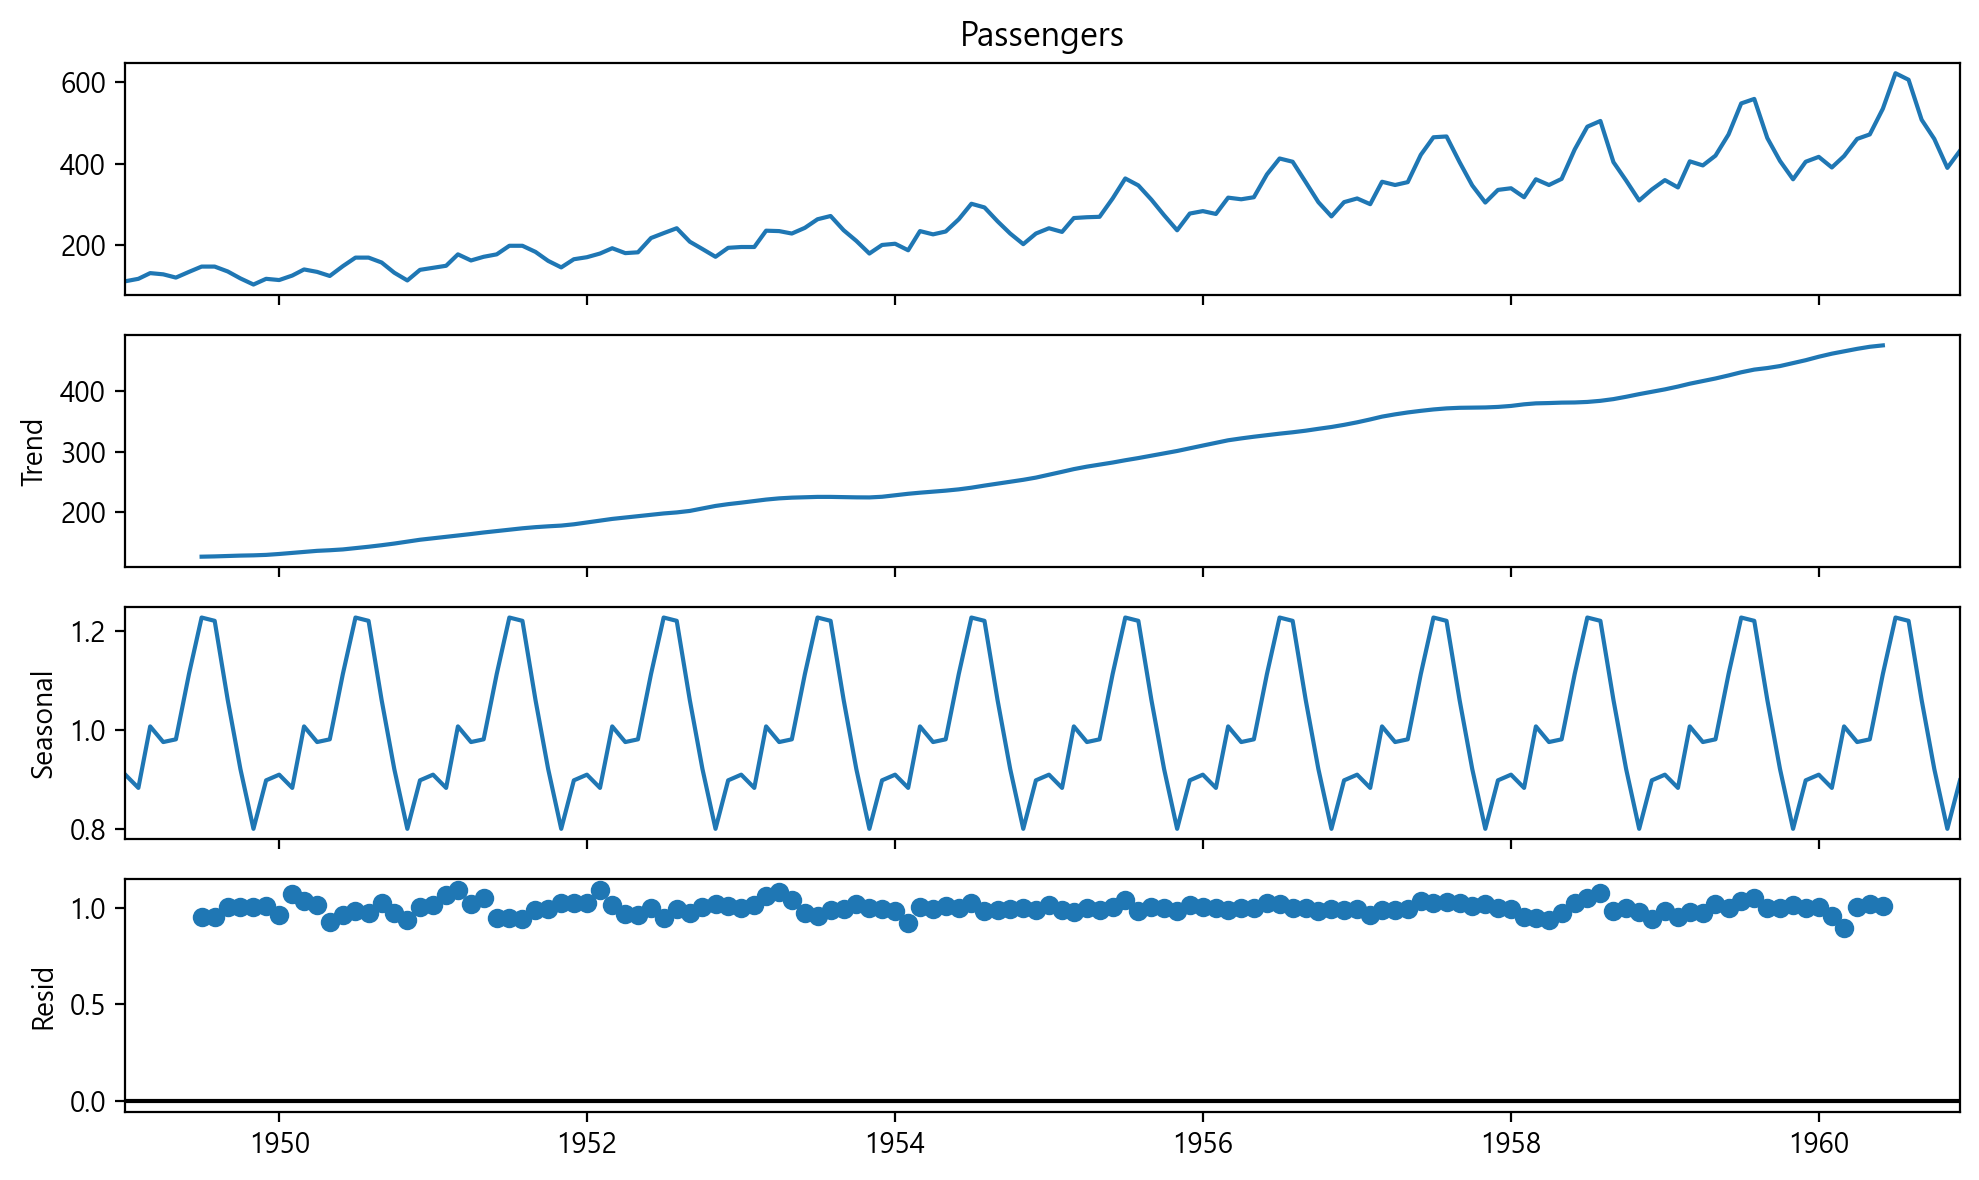

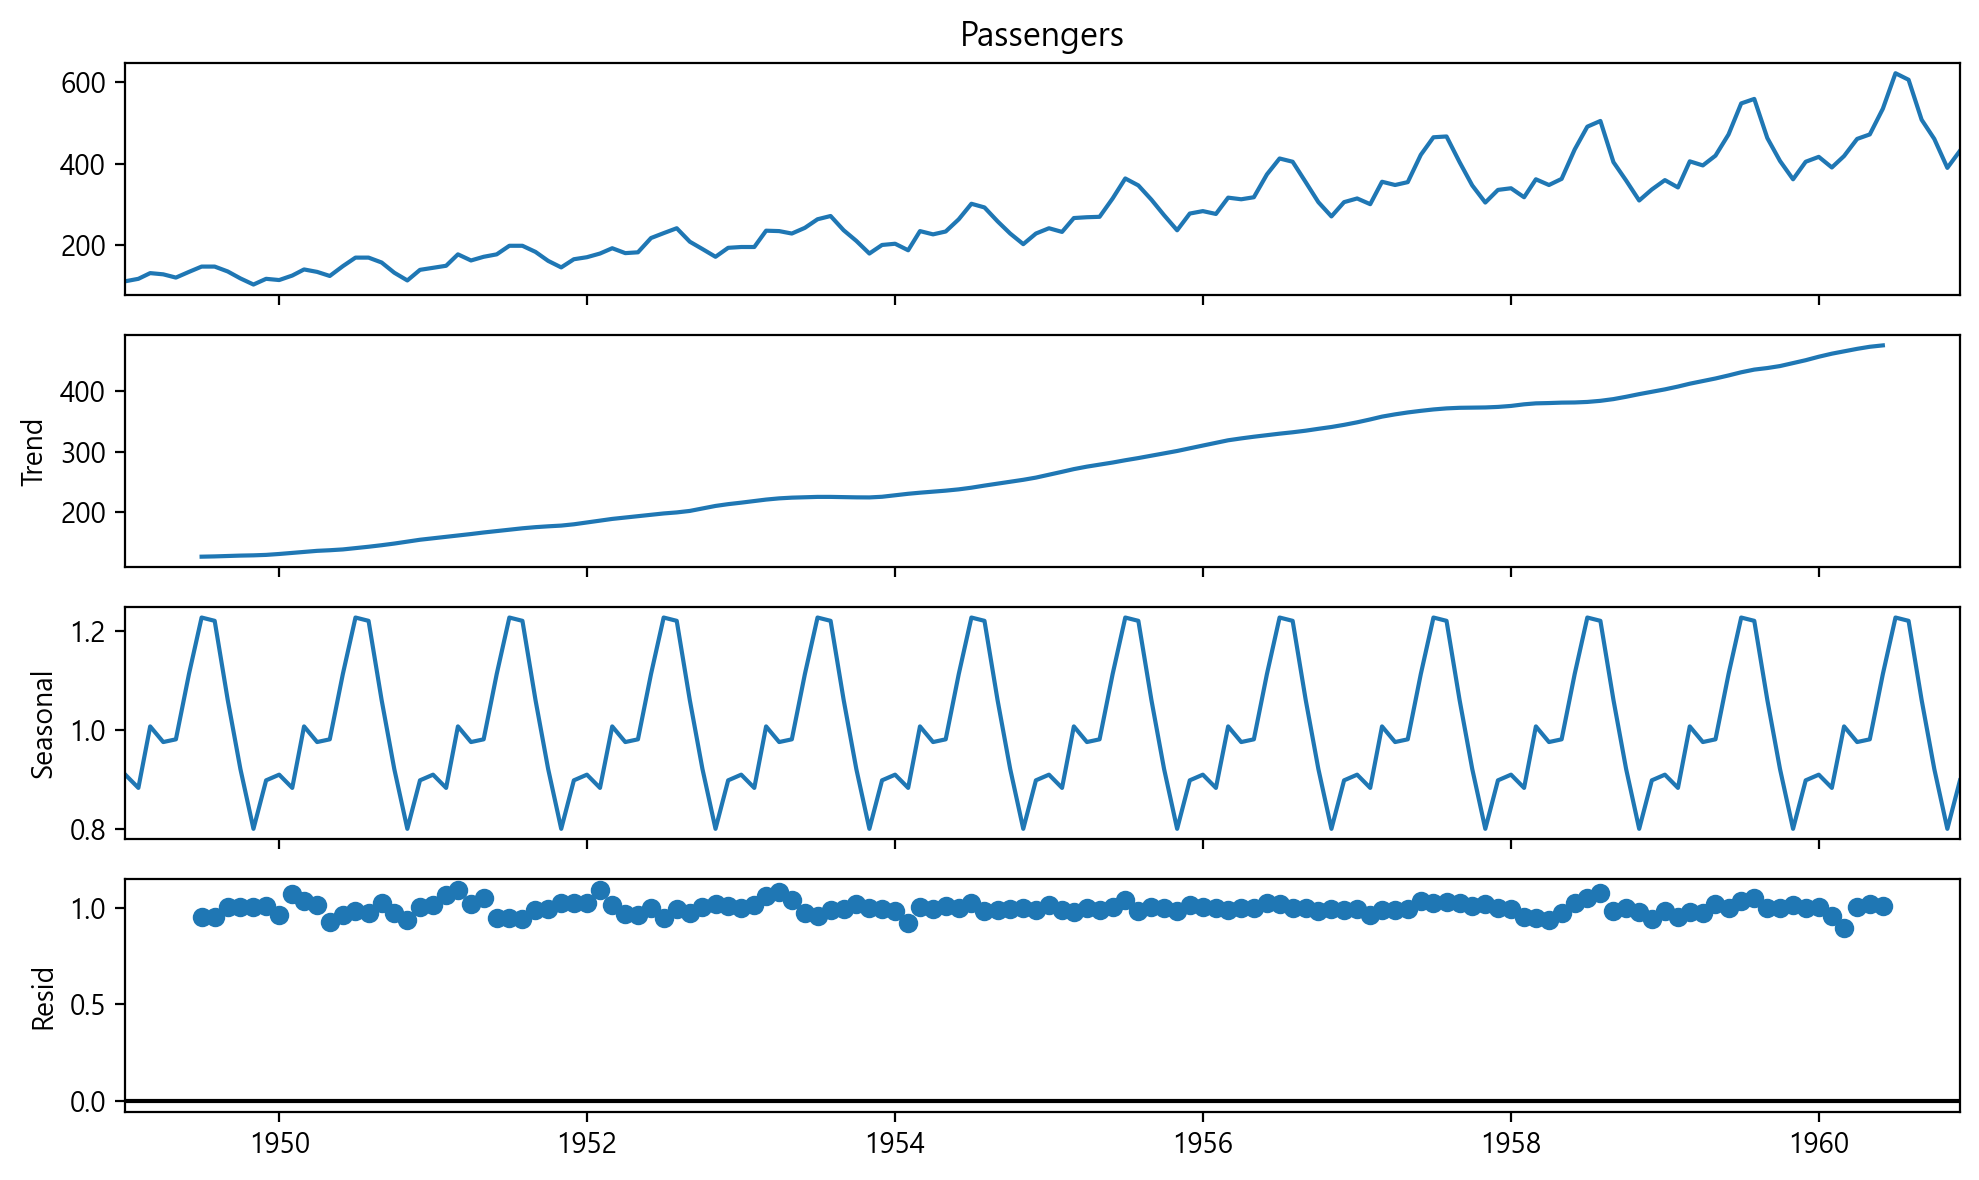

In [26]:
sd.plot()

- 객체의 plot 메서드로 데이터 시각화
    - 원본 데이터, 전반적인 크기의 변화를 나타내는 트렌드, 데이터 변화 주기, 잔차를 확인 가능

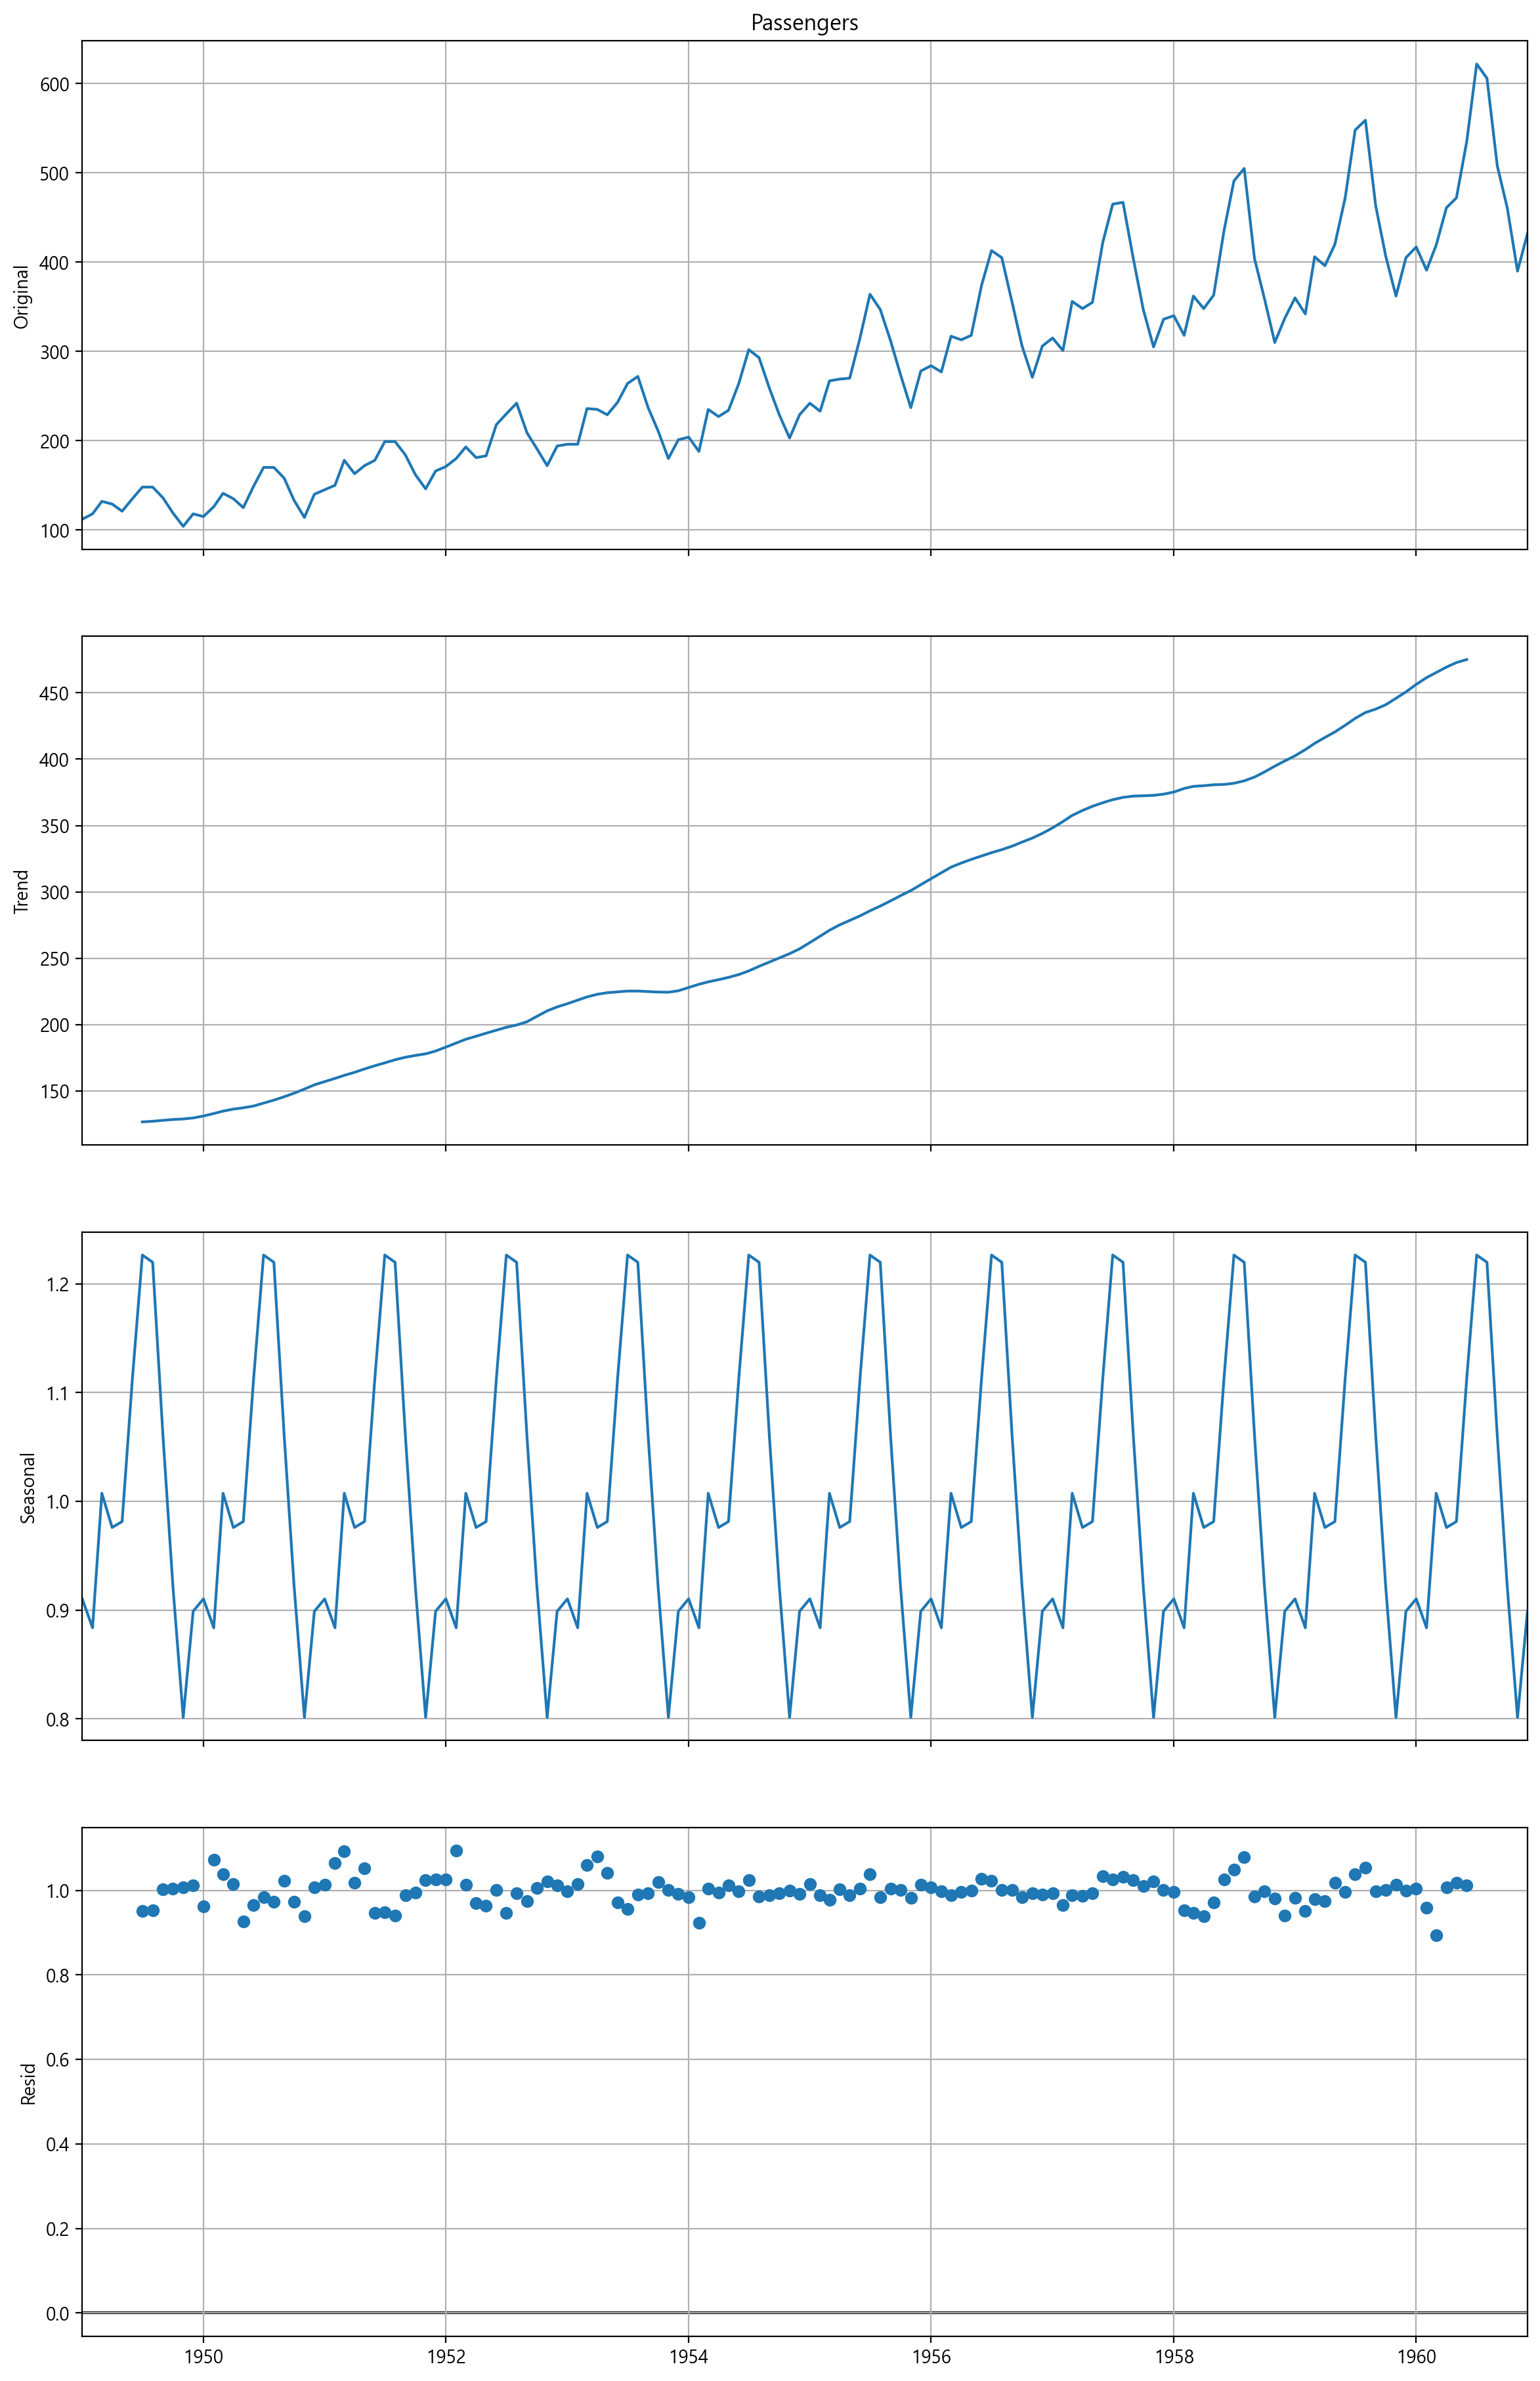

In [27]:
figure = sd.plot()
fig, ax1, ax2, ax3, ax4 = figure.get_children()

figure.set_size_inches((12, 20))

ax1.set_ylabel('Original')
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

plt.show()

- 평균이동법, 지수평활법, 분해시계열은 추세나 시각화 자료만 제공하며 하나의 정형화된 수치 결과를 전달하지는 않음
    - EDA에 가까움
    - 분석결과는 매우 주관적이며 명확한 근거를 제시하지도 못함

=========== 원본 데이터 ===========


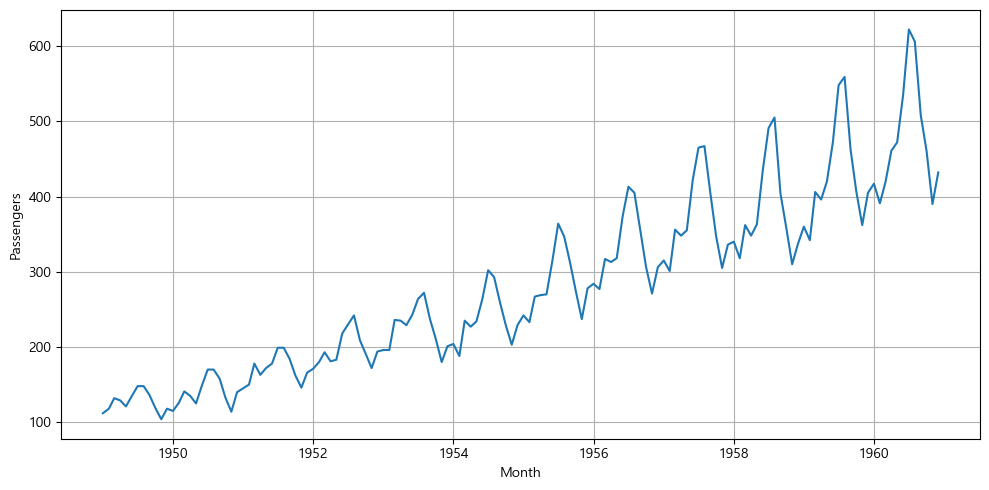

+----------------------------------+---------------------+
|                                  | ADF Test            |
|----------------------------------+---------------------|
| 검정통계량(ADF Statistic)        | 0.8153688792060597  |
| 유의수준(p-value)                | 0.9918802434376411  |
| 최적차수(num of lags)            | 13                  |
| 관측치 개수(num of observations) | 130                 |
| 기각값(Critical Values) 1%       | -3.4816817173418295 |
| 기각값(Critical Values) 5%       | -2.8840418343195267 |
| 기각값(Critical Values) 10%      | -2.578770059171598  |
| 데이터 정상성 여부               | 비정상              |
+----------------------------------+---------------------+
=========== 1차 차분 데이터 ===========


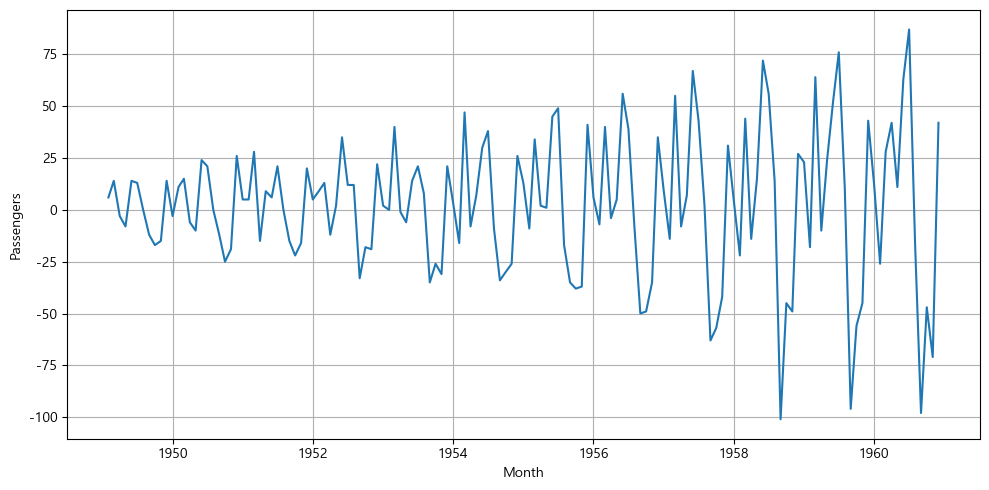

+----------------------------------+---------------------+
|                                  | ADF Test            |
|----------------------------------+---------------------|
| 검정통계량(ADF Statistic)        | -2.829266824169992  |
| 유의수준(p-value)                | 0.0542132902838265  |
| 최적차수(num of lags)            | 12                  |
| 관측치 개수(num of observations) | 130                 |
| 기각값(Critical Values) 1%       | -3.4816817173418295 |
| 기각값(Critical Values) 5%       | -2.8840418343195267 |
| 기각값(Critical Values) 10%      | -2.578770059171598  |
| 데이터 정상성 여부               | 비정상              |
+----------------------------------+---------------------+
=========== 2차 차분 데이터 ===========


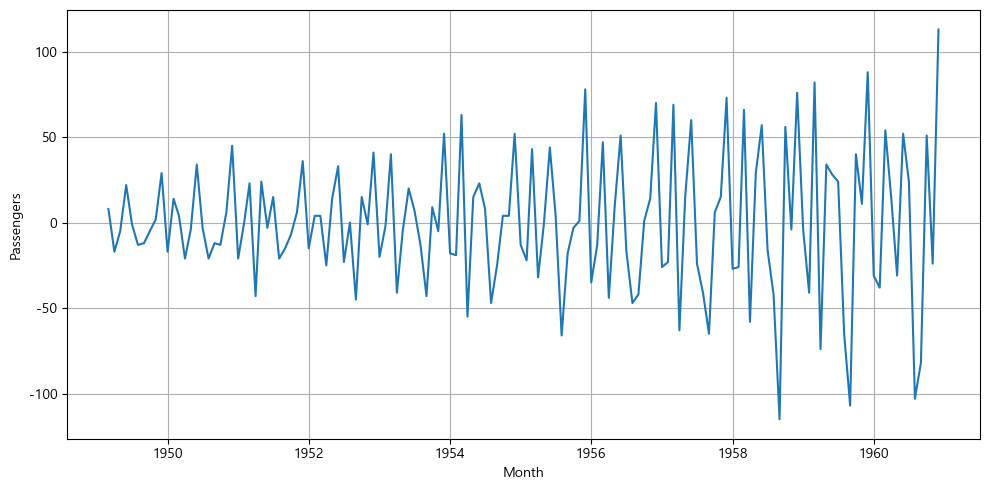

+----------------------------------+-----------------------+
|                                  | ADF Test              |
|----------------------------------+-----------------------|
| 검정통계량(ADF Statistic)        | -16.384231542468527   |
| 유의수준(p-value)                | 2.732891850014085e-29 |
| 최적차수(num of lags)            | 11                    |
| 관측치 개수(num of observations) | 130                   |
| 기각값(Critical Values) 1%       | -3.4816817173418295   |
| 기각값(Critical Values) 5%       | -2.8840418343195267   |
| 기각값(Critical Values) 10%      | -2.578770059171598    |
| 데이터 정상성 여부               | 정상                  |
+----------------------------------+-----------------------+


,Passengers
Month,
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
1949-07-01,-1.0
...,...
1960-08-01,-103.0
1960-09-01,-82.0
1960-10-01,51.0


In [28]:
my_diff(df1, yname = 'Passengers')